In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd
df = pd.read_csv('train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


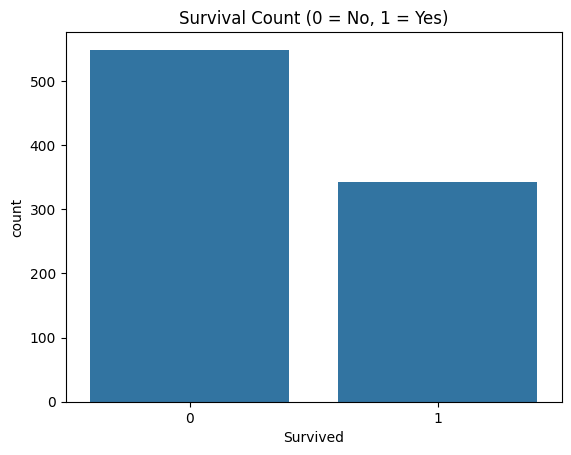

In [ ]:
# Basic info
df.info()

# Missing values
df.isnull().sum()

# Statistical summary
df.describe()

# Survival count
sns.countplot(x='Survived', data=df)
plt.title("Survival Count (0 = No, 1 = Yes)")
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

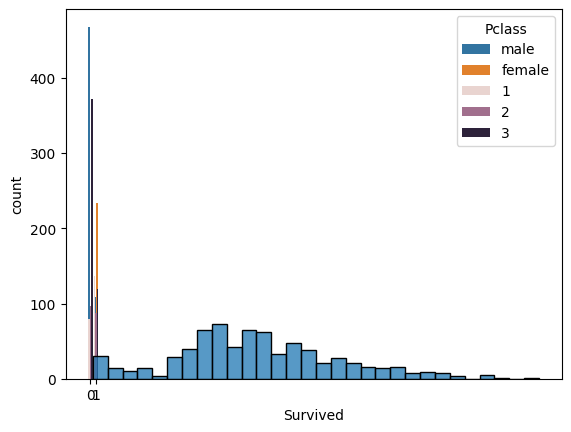

In [ ]:
sns.countplot(x='Survived', hue='Sex', data=df)
sns.countplot(x='Survived', hue='Pclass', data=df)
sns.histplot(df['Age'].dropna(), bins=30)

In [ ]:
# Fill missing Age with median
df['Age'] = df['Age'].fillna(df['Age'].median())

# Fill missing Embarked with mode
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

# Drop 'Cabin' if present
if 'Cabin' in df.columns:
    df = df.drop(columns='Cabin')

In [ ]:
# Create FamilySize from SibSp + Parch
df['FamilySize'] = df['SibSp'] + df['Parch']

# Drop less useful columns
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [ ]:
# Convert 'Sex' and 'Embarked' to numbers
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])  # male=1, female=0
df['Embarked'] = le.fit_transform(df['Embarked'])  # C=0, Q=1, S=2 (or similar)

In [ ]:
# Features and labels
X = df.drop('Survived', axis=1)
y = df['Survived']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

Accuracy: 0.8100558659217877
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.86      0.84       105
           1       0.79      0.74      0.76        74

    accuracy                           0.81       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.81      0.81       179



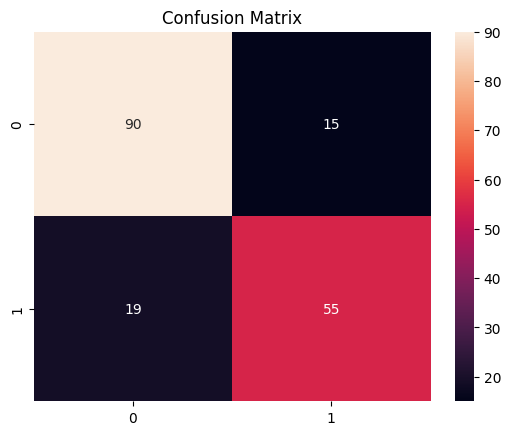

In [ ]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.show()

In [ ]:
from google.colab import files
uploaded = files.upload()  # Choose the test.csv file from your system

Saving test.csv to test.csv


In [ ]:
test_df = pd.read_csv('test.csv')
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
# Fill missing values
test_df['Age'] = test_df['Age'].fillna(test_df['Age'].median())
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].median())
test_df['Embarked'] = test_df['Embarked'].fillna(test_df['Embarked'].mode()[0])

# Create FamilySize
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test_df['Sex'] = le.fit_transform(test_df['Sex'])
test_df['Embarked'] = le.fit_transform(test_df['Embarked'])

# Drop columns not used in training
drop_cols = ['Name', 'Ticket', 'Cabin']
for col in drop_cols:
    if col in test_df.columns:
        test_df.drop(columns=col, inplace=True)


In [ ]:
passenger_ids = test_df['PassengerId']
test_df = test_df.drop(columns='PassengerId')

In [ ]:
predictions = model.predict(test_df)

In [ ]:
submission = pd.DataFrame({
    'PassengerId': passenger_ids,
    'Survived': predictions
})

submission.to_csv('submission.csv', index=False)

In [ ]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8100558659217877


In [ ]:
files.download('submission.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>